# 导入必要库

In [1]:
import gc

from core import RLEnv
from core.agent import BaseAgent
from greedy import (
    EpsilonDecreasingConfig,
    GreedyAgent,
    greedy_average,
    epsilon_average,
    epsilon_decreasing_average,
)
from ucb1 import UCBAgent, ucb1

In [2]:
from pathlib import Path


SEED: int = 42
MACHINE_COUNT: int = 10
COUNT: int = 50
STEPS: int = 100_000
CONVERGENCE_THRESHOLD: float = 0.9
CONVERGENCE_MIN_STEPS: int = 1000
OPTIMISTIC_TIMES: int = 1
ENABLE_OPTIMISTIC: bool = True
EXPERIMENT_DATA_DIR: Path = Path.cwd() / "experiment_data"

ENV: RLEnv = RLEnv(machine_count=MACHINE_COUNT, seed=SEED)
EPSILON_CONFIG: EpsilonDecreasingConfig = EpsilonDecreasingConfig()

In [ ]:
from train import batch_train
from utils import plot_metrics_history, save_experiment_data

# Agent 创建函数

In [4]:
def create_greedy_agent(
    env: RLEnv, 
    epsilon_config: EpsilonDecreasingConfig, 
    optimistic_init: bool, 
    optimistic_times: int,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return GreedyAgent(
        name=greedy_average.__name__,
        env=env,
        greedy_algorithm=greedy_average,
        epsilon_config=epsilon_config,
        optimistic_init=optimistic_init,
        optimistic_times=optimistic_times,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

def create_epsilon_agent(
    env: RLEnv, 
    epsilon_config: EpsilonDecreasingConfig, 
    optimistic_init: bool, 
    optimistic_times: int,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return GreedyAgent(
        name=epsilon_average.__name__,
        env=env,
        greedy_algorithm=epsilon_average,
        epsilon_config=epsilon_config,
        optimistic_init=optimistic_init,
        optimistic_times=optimistic_times,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

def create_decreasing_agent(
    env: RLEnv, 
    epsilon_config: EpsilonDecreasingConfig, 
    optimistic_init: bool, 
    optimistic_times: int,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return GreedyAgent(
        name=epsilon_decreasing_average.__name__,
        env=env,
        greedy_algorithm=epsilon_decreasing_average,
        epsilon_config=epsilon_config,
        optimistic_init=optimistic_init,
        optimistic_times=optimistic_times,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

In [5]:
def create_ucb1_agent(
    env: RLEnv,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return UCBAgent(
        name=ucb1.__name__,
        env=env,
        ucb1_algorithm=ucb1,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

# 训练

## 普通贪婪算法

达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1150
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
AverageMetrics(avg_regret=3628.62, avg_regret_rate=0.03991881188118811, avg_total_reward=87271.38, avg_optimal_rate=0.7198599859985993, avg_convergence_steps=723.0, avg_convergence_rate=0.72)
values=[0.14, 0.26, 0.5, 0.7, 0.98, 3.5, 1273.28, 5815.76, 14737.92, 65438.34] counts=[1.14, 1.26, 1.54, 1.7, 2.0, 6.58, 2004.28, 8000.8, 18001.9, 71978.8]
成功加载字体： /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/assets/微软雅黑.ttf


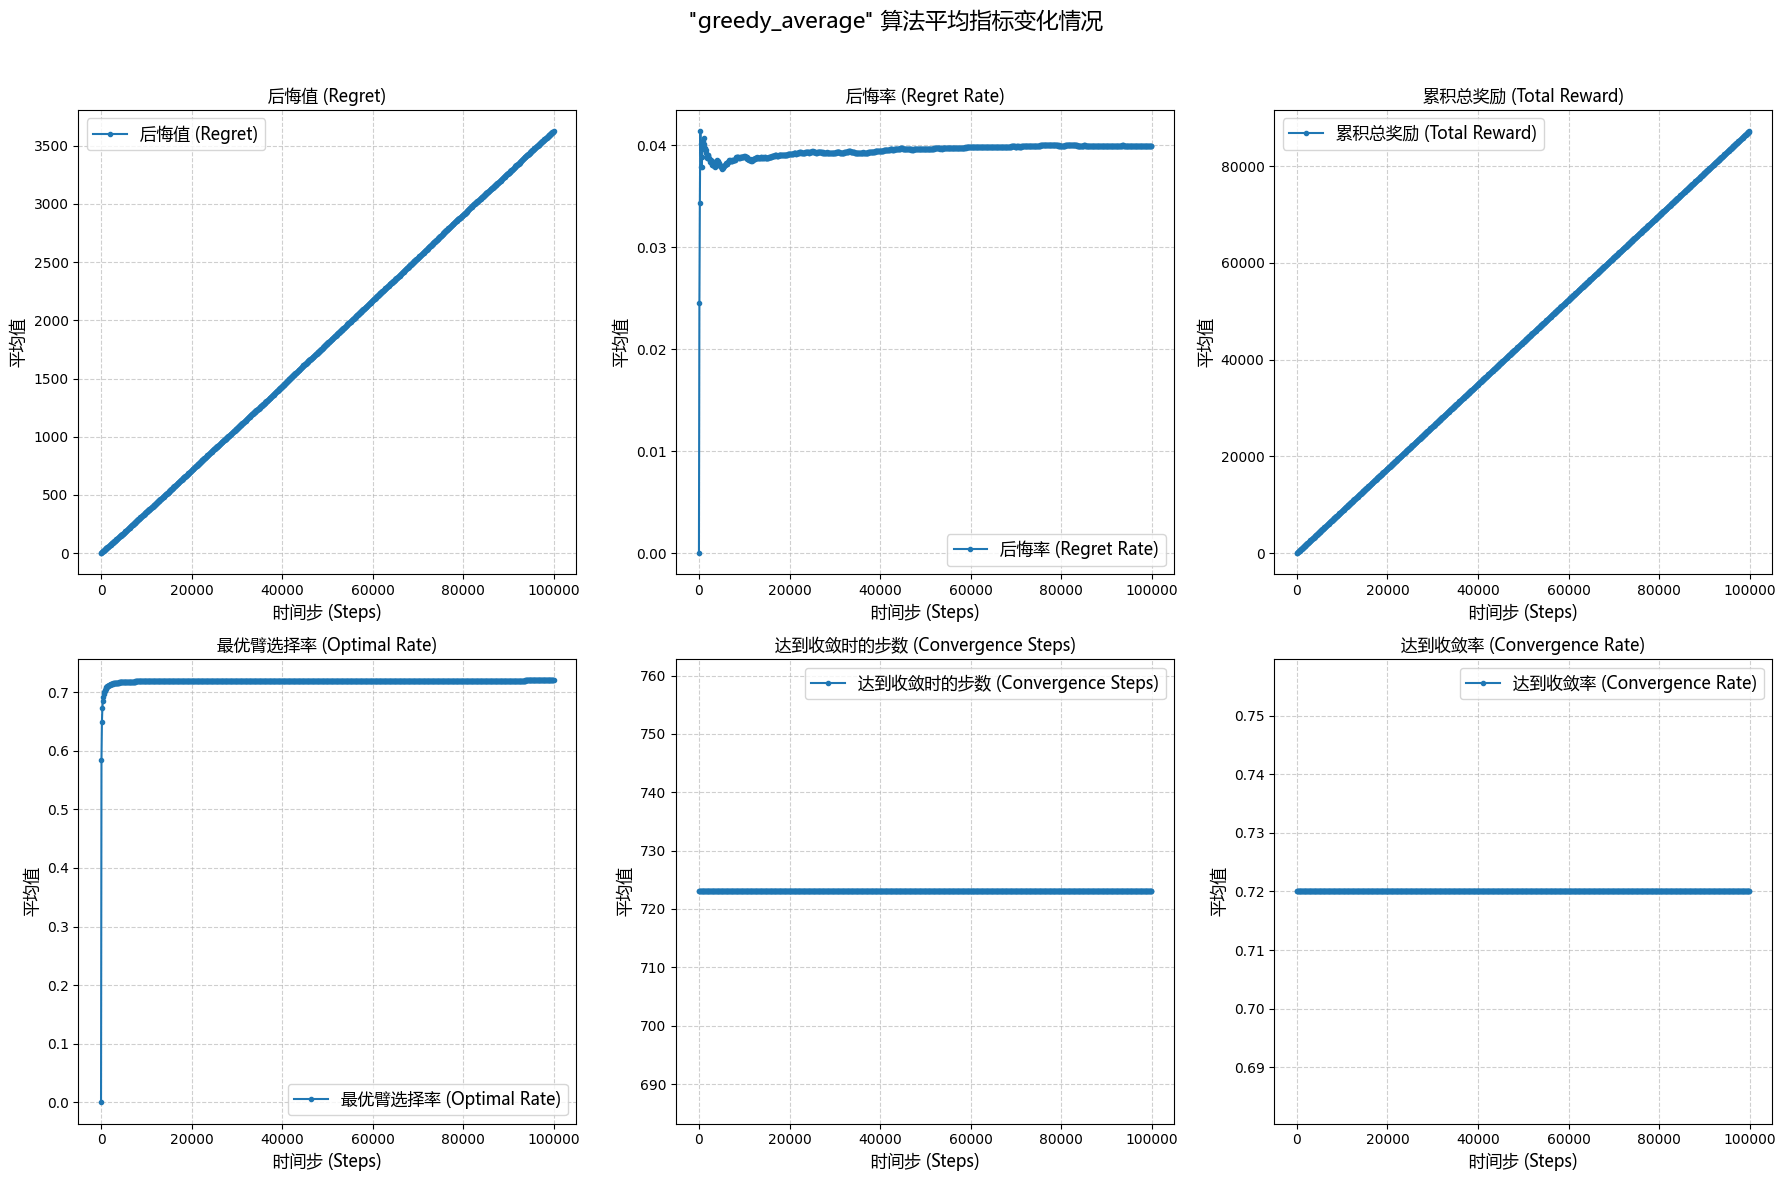

✅ 实验数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/greedy_average_T=100000_K=10_Q_0=1.png


22384

In [ ]:
agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_greedy_agent,
    env=ENV,
    epsilon_config=EPSILON_CONFIG,
    steps=STEPS,
    seed=SEED,
    optimistic_init=ENABLE_OPTIMISTIC,
    optimistic_times=OPTIMISTIC_TIMES,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
)
print(metrics)
print(reward)

file_name: Path =EXPERIMENT_DATA_DIR / f"{greedy_average.__name__}_T={STEPS}_K={MACHINE_COUNT}_Q_0={OPTIMISTIC_TIMES}.png"
plot_metrics_history(agents, greedy_average.__name__, file_name)
save_experiment_data(reward, metrics, file_name)

del agents, reward, metrics
gc.collect()

## epsilon-贪婪算法

达到收敛时的步数: 1000
达到收敛时的步数: 1600
达到收敛时的步数: 1030
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 4120
达到收敛时的步数: 3010
达到收敛时的步数: 1000
达到收敛时的步数: 1420
达到收敛时的步数: 1540
达到收敛时的步数: 1570
达到收敛时的步数: 2300
达到收敛时的步数: 22750
达到收敛时的步数: 60770
达到收敛时的步数: 5630
达到收敛时的步数: 1230
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1660
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 3850
达到收敛时的步数: 1000
达到收敛时的步数: 3940
达到收敛时的步数: 2760
达到收敛时的步数: 1000
达到收敛时的步数: 20940
达到收敛时的步数: 1000
达到收敛时的步数: 1280
达到收敛时的步数: 1000
达到收敛时的步数: 14080
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 2240
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 5380
达到收敛时的步数: 15040
达到收敛时的步数: 1000
达到收敛时的步数: 2800
达到收敛时的步数: 1390
达到收敛时的步数: 4300
达到收敛时的步数: 1760
达到收敛时的步数: 1000
AverageMetrics(avg_regret=4123.02, avg_regret_rate=0.04535775577557755, avg_total_reward=86776.98, avg_optimal_rate=0.9071741174117411, avg_convergence_steps=4127.8, avg_convergence_rate=0.88)
values=[90.12, 182.54, 270.08, 365.64, 458.2, 547.48, 654.06, 748.06, 1007.26, 82453.54] counts=[999.76, 1002.66, 994.04, 1005.2, 1004.52, 100

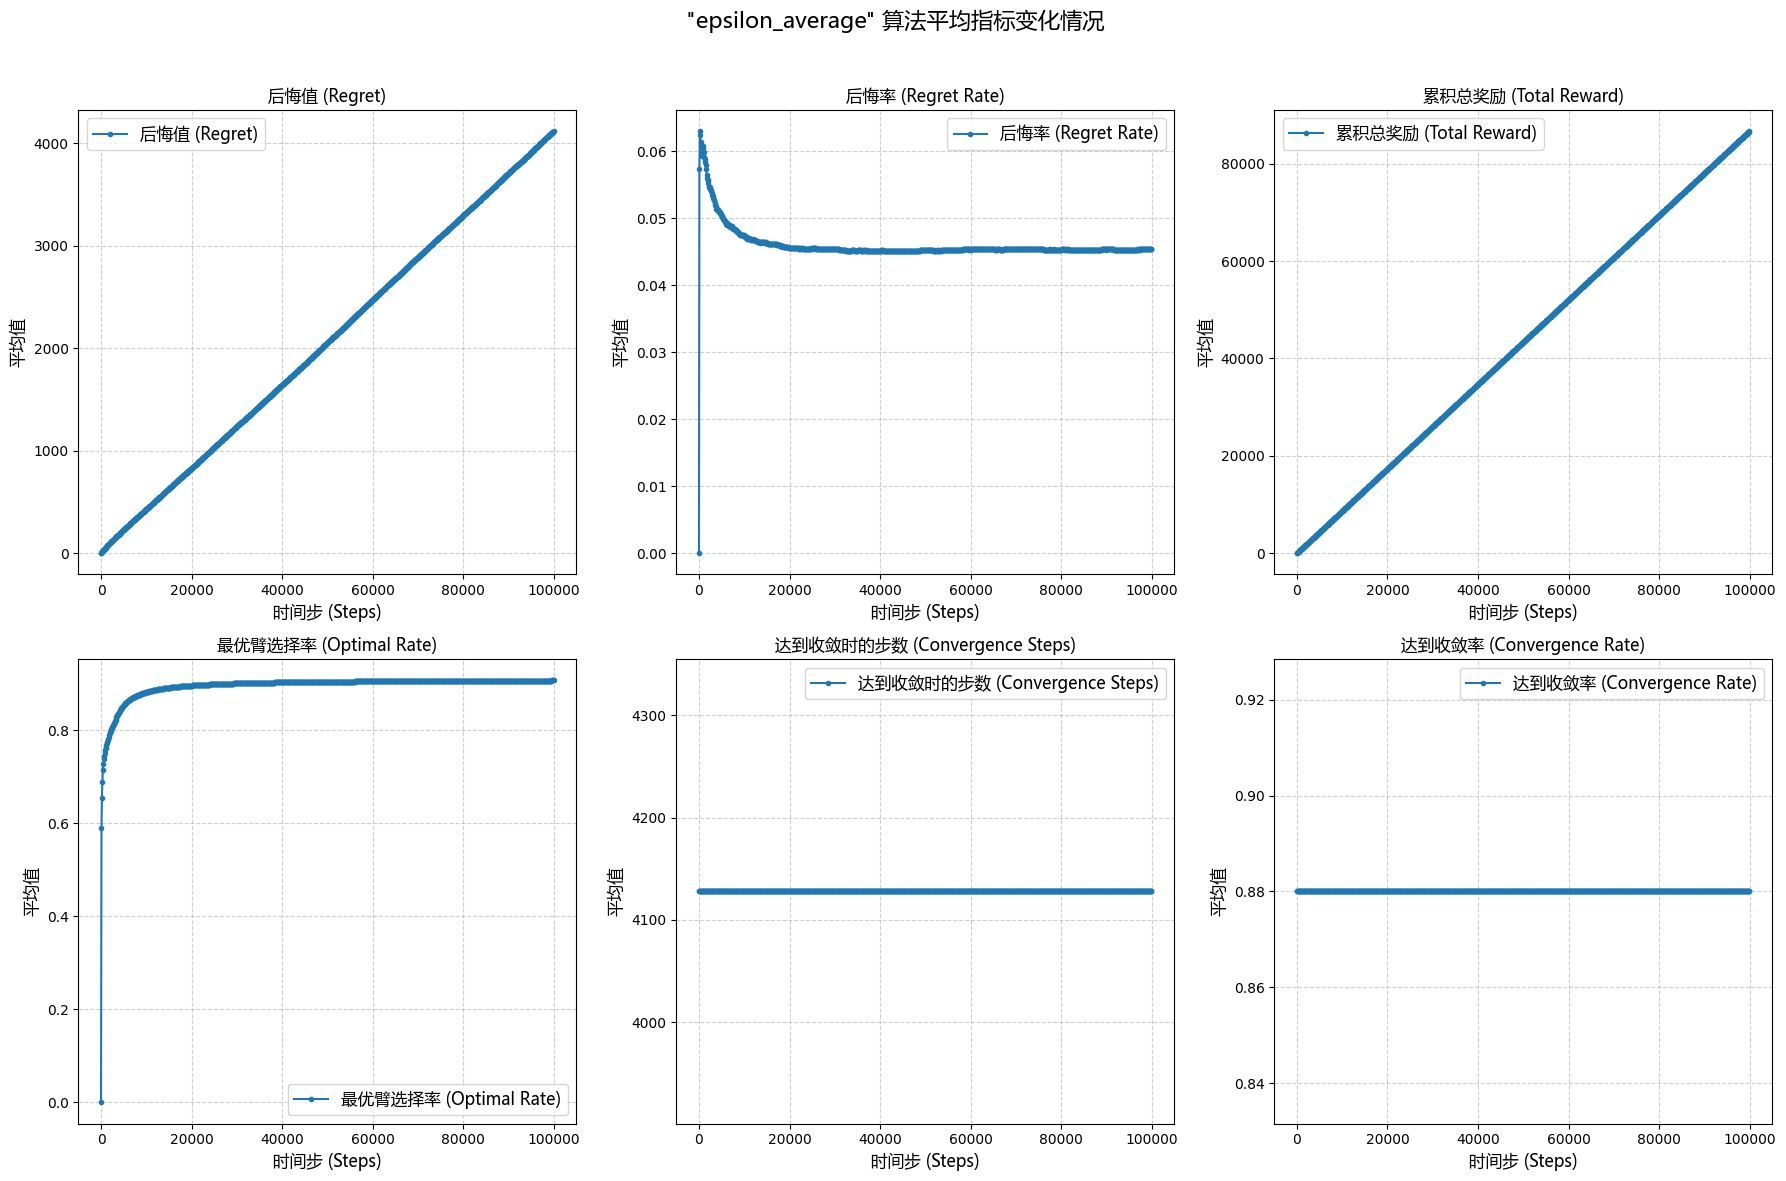

✅ 实验数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_average_T=100000_K=10_Q_0=1.png


21073

In [ ]:
agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_epsilon_agent,
    env=ENV,
    epsilon_config=EPSILON_CONFIG,
    steps=STEPS,
    seed=SEED,
    optimistic_init=ENABLE_OPTIMISTIC,
    optimistic_times=OPTIMISTIC_TIMES,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
)
print(metrics)
print(reward)

file_name: Path =EXPERIMENT_DATA_DIR / f"{epsilon_average.__name__}_T={STEPS}_K={MACHINE_COUNT}_Q_0={OPTIMISTIC_TIMES}.png"
plot_metrics_history(agents, epsilon_average.__name__, file_name)
save_experiment_data(reward, metrics, file_name)

del agents, reward, metrics
gc.collect()

## 退火 epsilon 贪婪算法

达到收敛时的步数: 2390
达到收敛时的步数: 1920
达到收敛时的步数: 2120
达到收敛时的步数: 2190
达到收敛时的步数: 1920
达到收敛时的步数: 1760
达到收敛时的步数: 1880
达到收敛时的步数: 2110
达到收敛时的步数: 2460
达到收敛时的步数: 2130
达到收敛时的步数: 4930
达到收敛时的步数: 2310
达到收敛时的步数: 5520
达到收敛时的步数: 2060
达到收敛时的步数: 1550
达到收敛时的步数: 2640
达到收敛时的步数: 1770
达到收敛时的步数: 1970
达到收敛时的步数: 2030
达到收敛时的步数: 2240
达到收敛时的步数: 1970
达到收敛时的步数: 2230
达到收敛时的步数: 1830
达到收敛时的步数: 2830
达到收敛时的步数: 2040
达到收敛时的步数: 2040
达到收敛时的步数: 2830
达到收敛时的步数: 1820
达到收敛时的步数: 1910
达到收敛时的步数: 1950
达到收敛时的步数: 1660
达到收敛时的步数: 1880
达到收敛时的步数: 2030
达到收敛时的步数: 2680
达到收敛时的步数: 1950
达到收敛时的步数: 2000
达到收敛时的步数: 2050
达到收敛时的步数: 1770
达到收敛时的步数: 1760
达到收敛时的步数: 1990
达到收敛时的步数: 1830
达到收敛时的步数: 2040
达到收敛时的步数: 2070
达到收敛时的步数: 1980
达到收敛时的步数: 1810
达到收敛时的步数: 1840
AverageMetrics(avg_regret=650.54, avg_regret_rate=0.007156655665566557, avg_total_reward=90249.46, avg_optimal_rate=0.9690775077507751, avg_convergence_steps=2013.8, avg_convergence_rate=0.92)
values=[10.82, 22.32, 32.88, 43.08, 55.9, 65.6, 79.52, 91.84, 1742.5, 88105.0] counts=[116.84, 120.52, 119.0, 119.32,

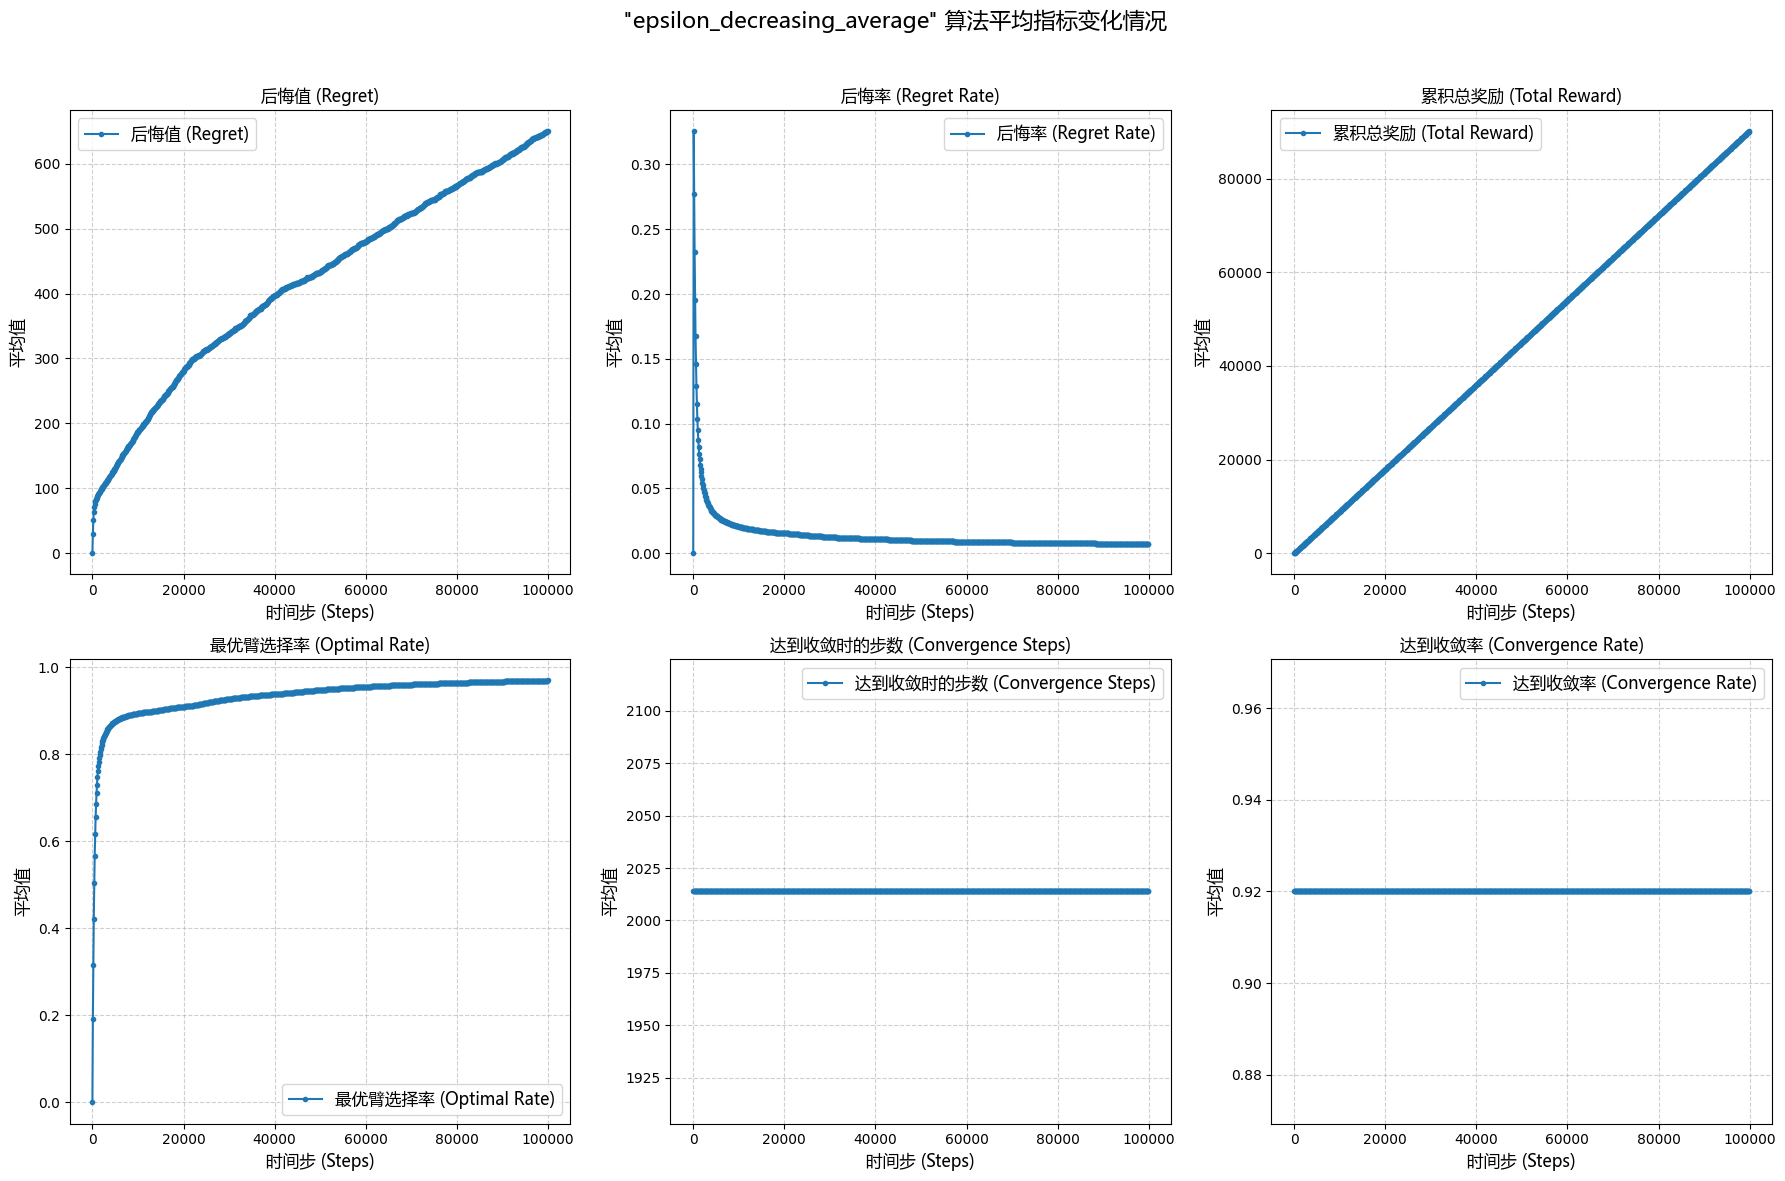

✅ 实验数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_decreasing_average_T=100000_K=10_Q_0=1.png


21998

In [ ]:
agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_decreasing_agent,
    env=ENV,
    epsilon_config=EPSILON_CONFIG,
    steps=STEPS,
    seed=SEED,
    optimistic_init=ENABLE_OPTIMISTIC,
    optimistic_times=OPTIMISTIC_TIMES,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
)
print(metrics)
print(reward)

file_name: Path =EXPERIMENT_DATA_DIR / f"{epsilon_decreasing_average.__name__}_T={STEPS}_K={MACHINE_COUNT}_Q_0={OPTIMISTIC_TIMES}.png"
plot_metrics_history(agents, epsilon_decreasing_average.__name__, file_name)
save_experiment_data(reward, metrics, file_name)

del agents, reward, metrics
gc.collect()

## UCB1算法

达到收敛时的步数: 23610
达到收敛时的步数: 24150
达到收敛时的步数: 21950
达到收敛时的步数: 21250
达到收敛时的步数: 25830
达到收敛时的步数: 23900
达到收敛时的步数: 27730
达到收敛时的步数: 23910
达到收敛时的步数: 19970
达到收敛时的步数: 21030
达到收敛时的步数: 24920
达到收敛时的步数: 26680
达到收敛时的步数: 23220
达到收敛时的步数: 25480
达到收敛时的步数: 18600
达到收敛时的步数: 24500
达到收敛时的步数: 22730
达到收敛时的步数: 24270
达到收敛时的步数: 22700
达到收敛时的步数: 25340
达到收敛时的步数: 20800
达到收敛时的步数: 26510
达到收敛时的步数: 21920
达到收敛时的步数: 26760
达到收敛时的步数: 22700
达到收敛时的步数: 24480
达到收敛时的步数: 21780
达到收敛时的步数: 28000
达到收敛时的步数: 22920
达到收敛时的步数: 23510
达到收敛时的步数: 22450
达到收敛时的步数: 25320
达到收敛时的步数: 24580
达到收敛时的步数: 29200
达到收敛时的步数: 24310
达到收敛时的步数: 23710
达到收敛时的步数: 24010
达到收敛时的步数: 20570
达到收敛时的步数: 22860
达到收敛时的步数: 23660
达到收敛时的步数: 20080
达到收敛时的步数: 17130
达到收敛时的步数: 23800
达到收敛时的步数: 20920
达到收敛时的步数: 25900
达到收敛时的步数: 18040
达到收敛时的步数: 20970
达到收敛时的步数: 24450
达到收敛时的步数: 24450
达到收敛时的步数: 25990
AverageMetrics(avg_regret=601.6909090909118, avg_regret_rate=0.00661860000000003, avg_total_reward=90307.4, avg_optimal_rate=0.9667879999999996, avg_convergence_steps=23471.0, avg_convergence_rate=1.0

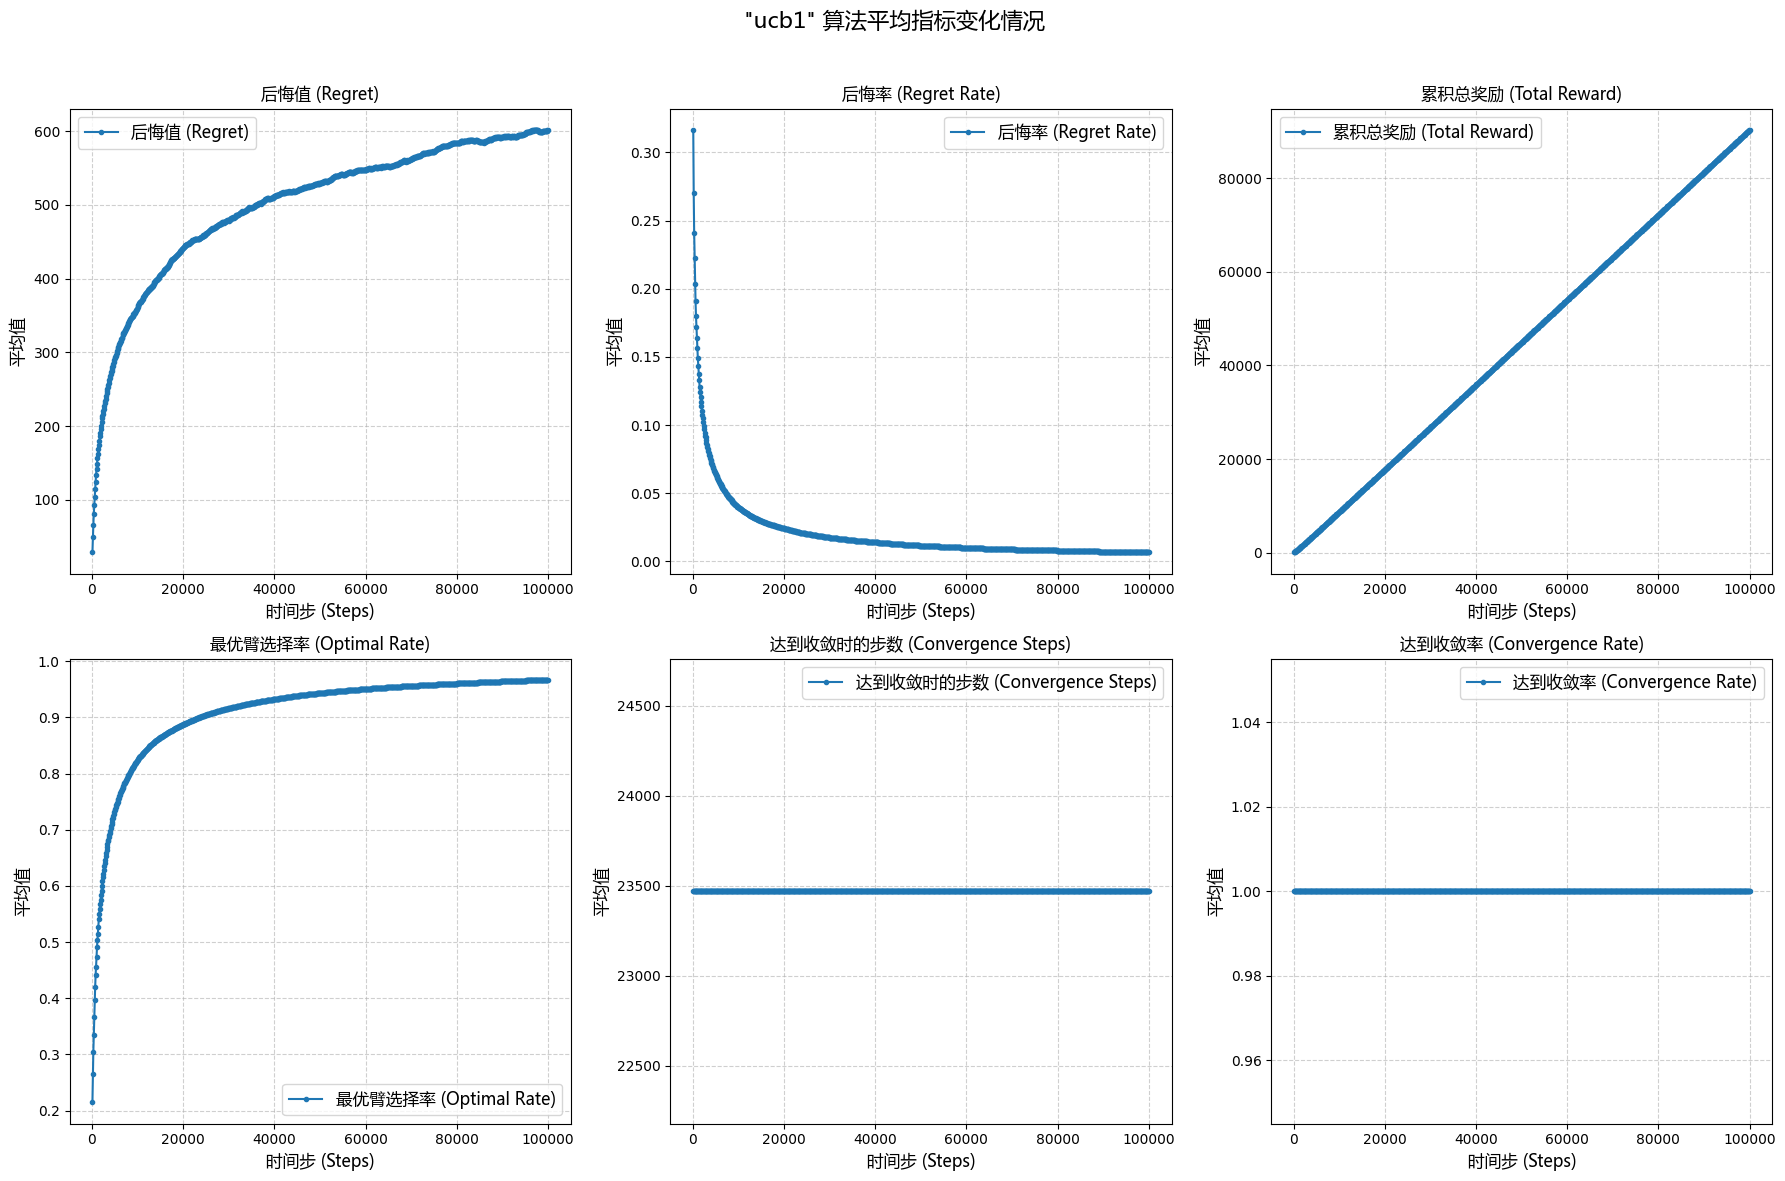

✅ 实验数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/ucb1_T=100000_K=10.png


21844

In [ ]:
agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_ucb1_agent,
    env=ENV,
    steps=STEPS,
    seed=SEED,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
)
print(metrics)
print(reward)

file_name: Path =EXPERIMENT_DATA_DIR / f"{ucb1.__name__}_T={STEPS}_K={MACHINE_COUNT}.png"
plot_metrics_history(agents, ucb1.__name__, file_name)
save_experiment_data(reward, metrics, file_name)

del agents, reward, metrics
gc.collect()